<div style="background-color:lightblue; padding:10px;">  
    
# Loan Data Set
You will be working with the data set **loan_data.csv**. This data set captures the information submitted by customers in their online application forms for requesting a loan. This information includes gender, marital status, education, number of dependents, income, loan amount, credit history, and other relevant details. We are interested in the **Loan_Status** of the customers, whether or not they were approved for the loan. If a customer is approved for a loan, their **Loan_Status** is denoted with a **Y**. If a customer is not approved for a loan, **Loan_Status** is denoted with a **N**.

In [1]:
#import all packages needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv("/Users/shanisewalker/Dropbox/CAU Courses/CMAT 651/Exams/Exam 1 Programming/loan_data.csv")

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Exploration

In [4]:
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Add a Loan Status Numerical Variable
Currently, an applicant's **Loan_Status** is denoted with a **Y** (meaning they are approved) or a **N** (meaning they are not approved). In the following code, a new variable **Loan_Status_Numeric**  is created to change **Loan_Status** from a categorical to a numerical variable. 

In [7]:
#new index column for Loan Status to create a numberical column 
#instead of categorical column for Loan Status
loan['Loan_Status_Numeric'] = loan['Loan_Status']

#create a dictionary for loan_status
dict_loan_status = {"Loan_Status_Numeric": {"N": 0, "Y": 1}} 
loan.replace(dict_loan_status, inplace=True)

loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Numeric
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


### Correlation Matrix for numerical variables

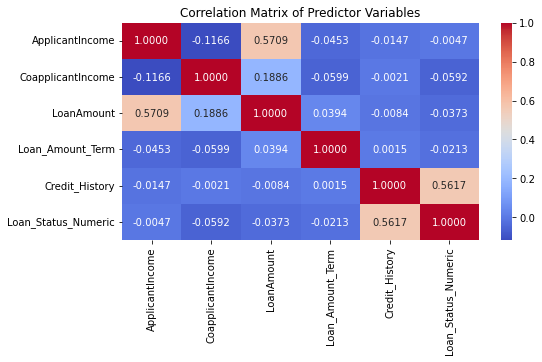

In [8]:
# Calculating the correlation matrix for predictor variables
correlation_matrix = loan.corr()

# Plotting the correlation matrix
#correlation_matrix.style.background_gradient(cmap = 'coolwarm')

# Plotting the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap = 'coolwarm')
plt.title("Correlation Matrix of Predictor Variables")
plt.show()

### Contigency table of Gender and Married

In [9]:
#contigency table of gender and married
crosstab01 = pd.crosstab(loan['Gender'], loan['Married'])


#gather the totals for the contigency tables and create a new index for Total
crosstab01['Total'] = crosstab01.sum(axis=1) #new index column name Total that sums to rows
crosstab01.loc['Total'] = crosstab01.sum() #gather the total of each row of the table
crosstab01


Married,No,Yes,Total
Gender,,,
Female,80,31,111
Male,130,357,487
Total,210,388,598


### Bar graph and Normalized Bar Graph of Credit_History with overlay of Loan_Status

<function matplotlib.pyplot.show(close=None, block=None)>

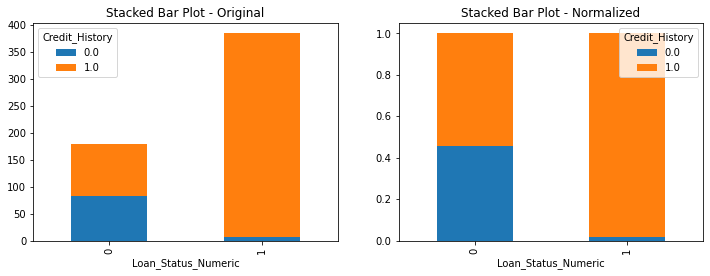

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [10]:
#Bar graph and Normalized Bar Graph of Credit_History with overlay of Loan_Status

#contigency table of gender and married
crosstab02 = pd.crosstab(loan['Loan_Status_Numeric'], loan['Credit_History'])
                         
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#crosstab01 bar graph
plt.figure(figsize=(4, 4))
crosstab02.plot(kind='bar', stacked = True, ax=axes[0])
axes[0].set_title('Stacked Bar Plot - Original')

#run this code block to create a normalized contigency table from crosstab_01
plt.figure(figsize=(4, 4))
crosstab_norm = crosstab02.div(crosstab02.sum(1), axis = 0)
#create a stacked bar graph using crosstab_norm
crosstab_norm.plot(kind='bar', stacked = True, ax=axes[1])
axes[1].set_title('Stacked Bar Plot - Normalized')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show

## Data Preparation
Here we clean the data and change all categorical variables to numerical variables, we replace NaN values with -1. 

In [11]:
#new index column for Education to create a numerical column 
loan['Education'] = loan['Education']
#create a dictionary for loan_status
dict_gender = {"Education": {"Not Graduate": 0, "Graduate": 1}} 
loan.replace(dict_gender, inplace=True)


#new index column for Gender to create a numerical column 
loan['Gender'] = loan['Gender']
#create a dictionary for Gender
dict_gender = {"Gender": {"Male": 1, "Female": 0}} 
loan.replace(dict_gender, inplace=True)


#new index column for Married to create a numerical column 
loan['Married'] = loan['Married']
#create a dictionary for Married
dict_gender = {"Married": {"No": 0, "Yes": 1}} 
loan.replace(dict_gender, inplace=True)


#new index column for Self_Employed to create a numerical column 
loan['Self_Employed'] = loan['Self_Employed']
#create a dictionary for Self_Employed
dict_selfemp = {"Self_Employed": {"No": 0, "Yes": 1}} 
loan.replace(dict_selfemp, inplace=True)


#new index column for Dependents to create a numerical column 
loan['Dependents'] = loan['Dependents']
#create a dictionary for Dependents
dict_prop = {"Dependents": {"0": 0, "1": 1, "2": 2, "3+": 3}} 
loan.replace(dict_prop, inplace=True)

#new index column for gender to create a numerical column 
loan['Property_Area'] = loan['Property_Area']
#create a dictionary for Property_Area
dict_prop = {"Property_Area": {"Rural": 0, "Urban": 1, "Semiurban": 2}} 
loan.replace(dict_prop, inplace=True)

#replace NaN values to -1 on all variables
loan['Credit_History'].fillna(-1, inplace=True)
loan['LoanAmount'].fillna(-1, inplace=True)
loan['Loan_Amount_Term'].fillna(-1, inplace=True)
loan['Gender'].fillna(-1, inplace=True)
loan['Married'].fillna(-1, inplace=True)
loan['Dependents'].fillna(-1, inplace=True)
loan['Self_Employed'].fillna(-1, inplace=True)

In [12]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Numeric
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,-1.0,360.0,1.0,1,Y,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y,1


In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    float64
 2   Married              614 non-null    float64
 3   Dependents           614 non-null    float64
 4   Education            614 non-null    int64  
 5   Self_Employed        614 non-null    float64
 6   ApplicantIncome      614 non-null    int64  
 7   CoapplicantIncome    614 non-null    float64
 8   LoanAmount           614 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Property_Area        614 non-null    int64  
 12  Loan_Status          614 non-null    object 
 13  Loan_Status_Numeric  614 non-null    int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 67.3+ KB


## Train_Test_Split 

In [14]:
loan_train, loan_test = train_test_split(loan, test_size = 0.25, random_state = 7)

### Isolating target variables from predictor variables in both the training and test data sets

In [15]:
#Isolating target variables from predictor variables in both the training and test data sets

#X_train predictor Variable
X_train = loan_train.drop(columns=['Loan_ID', 'Loan_Status', 'Loan_Status_Numeric'])

#X_test predictor Variable
X_test = loan_test.drop(columns=['Loan_ID', 'Loan_Status', 'Loan_Status_Numeric'])

#Y_train categorical target variable for loan status
Y_train_cat = loan_train['Loan_Status']

#Y_train numerical target variable for loan status
Y_train_num = loan_train['Loan_Status_Numeric']

#Y_test categorical target variable for loan status
Y_test_cat = loan_test['Loan_Status']

#Y_train numerical target variable for loan status
Y_test_num = loan_test['Loan_Status_Numeric']

In [16]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
192,1.0,1.0,0.0,0,0.0,6033,0.0,160.0,360.0,1.0,1
280,1.0,0.0,1.0,0,1.0,4053,2426.0,158.0,360.0,0.0,1
418,1.0,1.0,0.0,1,0.0,1025,2773.0,112.0,360.0,1.0,0
259,1.0,1.0,3.0,0,0.0,4931,0.0,128.0,360.0,-1.0,2
436,1.0,0.0,0.0,1,0.0,1926,1851.0,50.0,360.0,1.0,2


In [17]:
# Replace NaN values with a specific value (e.g., 0)
loan['Credit_History'].fillna(-1, inplace=True)

# Convert 'Category' column to numerical values
loan['Credit_History'] = pd.Categorical(loan['Credit_History']).codes

# Convert 'Category' column to float
loan['Credit_History'] = loan['Credit_History'].astype(float)


#loan['Credit_History'].fillna(-1, inplace=True)

In [18]:
loan['Credit_History'].value_counts()

2.0    475
1.0     89
0.0     50
Name: Credit_History, dtype: int64

In [19]:
loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Loan_Status_Numeric    0
dtype: int64

## Modeling and Evaluation of CART Algorithm

### Run the CART algorithm on the training data set and make predictions

In [20]:
#run the cart algorithm on the training data set with X_train and Y_train_num
cart01 = DecisionTreeClassifier(criterion = "gini", 
                                max_leaf_nodes=5).fit(X_train, Y_train_num)

In [21]:
#use cart algorithm to make predictions on X_test
ypred_cart = cart01.predict(X_test)

### Calculate Evaluation Metrics for CART algorithm

In [22]:
mse_cart = mean_squared_error(Y_test_num, ypred_cart)
mae_cart = mean_absolute_error(Y_test_num, ypred_cart)

print(f"CART Algorithm Model - Mean Squared Error: {mse_cart}")
print(f"CART Algortithm Model - Mean Absolute Error: {mae_cart}")

CART Algorithm Model - Mean Squared Error: 0.18831168831168832
CART Algortithm Model - Mean Absolute Error: 0.18831168831168832


### Feature Importances for CART algorithm

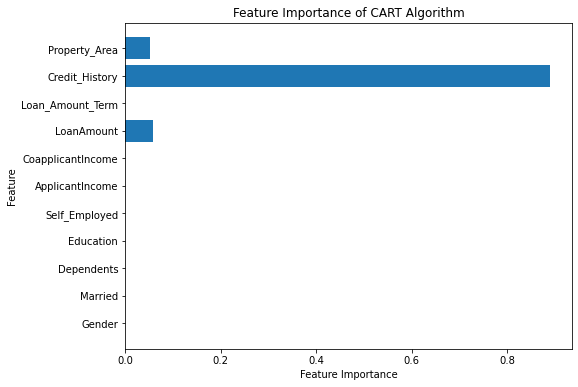

In [23]:
# Get feature importance
importance = cart01.feature_importances_

#get column names
X_names = X_train.columns
feature_names = X_names

plt.figure(figsize=(8, 6))
plt.barh(range(X_train.shape[1]), importance, align='center')
plt.yticks(np.arange(X_train.shape[1]), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of CART Algorithm')
plt.show()

## Modeling and Evaluation of Gaussian Naive Bayes Algorithm

### Run the Gaussian Naive Bayes algorithm on the training data set and make predictions

In [24]:
#run Gaussian Naive Bayes on the training data set with X_train and Y_train_num
GNB01 = GaussianNB().fit(X_train, Y_train_num)

In [25]:
#use Gaussian Naive Bayes algorithm to make predictions on X_test
ypred_GNB = GNB01.predict(X_test)

### Calculate Evaluation Metrics for Gaussian Naive Bayes algorithm

In [26]:
mse_GNB = mean_squared_error(Y_test_num, ypred_GNB)
mae_GNB = mean_absolute_error(Y_test_num, ypred_GNB)

print(f"Gaussian Naive Bayes Algorithm Model - Mean Squared Error: {mse_GNB}")
print(f"Gaussian Naive Bayes Algortithm Model - Mean Absolute Error: {mae_GNB}")

Gaussian Naive Bayes Algorithm Model - Mean Squared Error: 0.35064935064935066
Gaussian Naive Bayes Algortithm Model - Mean Absolute Error: 0.35064935064935066


### Feature Importances for Gaussian Naive Bayes Algorithm

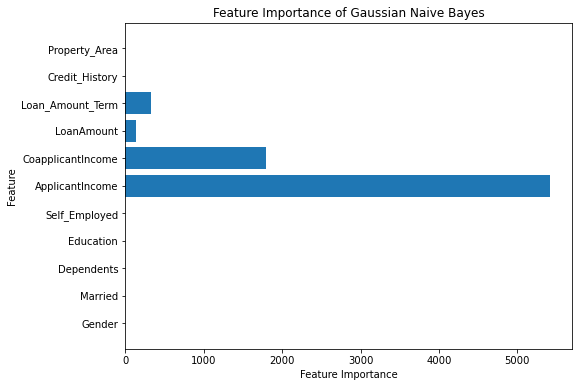

In [27]:
# Get mean and standard deviation of each feature for each class
class_means = GNB01.theta_
class_stddevs = GNB01.sigma_

# Calculate feature importance (using mean or standard deviation)
# For simplicity, let's use the mean
importance = np.mean(class_means, axis=0)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(X_train.shape[1]), importance, align='center')
plt.yticks(np.arange(X_train.shape[1]), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Gaussian Naive Bayes')
plt.show()

### Run the Multiple Linear Regression algorithm on the training data set and make predictions

In [28]:
# add constant to X_train data set
Xtrain = sm.add_constant(X_train)

#add constant to X_test data set
Xtest = sm.add_constant(X_test)

/Users/shanisewalker/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
#run Multiple Linear Regression on the training data set with Xtrain and Y_train_num
reg01 = sm.OLS(Y_train_num, Xtrain).fit()

In [30]:
#use Multiple Linear Regression to make predictions on Xtest
ypred_reg = reg01.predict(Xtest)

### Calculate Evaluation Metrics for Multiple Linear Regression algorithm

In [31]:
mse_reg = mean_squared_error(Y_test_num, ypred_reg)
mae_reg = mean_absolute_error(Y_test_num, ypred_reg)
#accuracy_reg = accuracy_score(Y_test_num, ypred_reg)

print(f"Gaussian Naive Bayes Algorithm Model - Mean Squared Error: {mse_reg}")
print(f"Gaussian Naive Bayes Algortithm Model - Mean Absolute Error: {mae_reg}")
#print(f"Gaussian Naive Bayes Algortithm Model  - Accuracy Score: {accuracy_reg}")

Gaussian Naive Bayes Algorithm Model - Mean Squared Error: 0.19417265890932137
Gaussian Naive Bayes Algortithm Model - Mean Absolute Error: 0.3834264018467577


### Feature Importances for Multiple Linear Regression

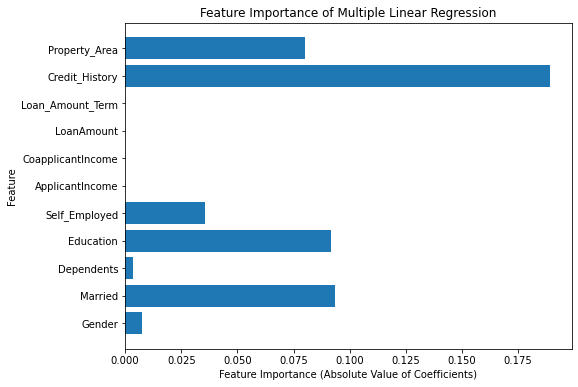

In [32]:
# Get coefficients (feature importance)
importance = np.abs(reg01.params[1:])  # Exclude the intercept term

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel('Feature Importance (Absolute Value of Coefficients)')
plt.ylabel('Feature')
plt.title('Feature Importance of Multiple Linear Regression')
plt.show()